# Text Data Preprocessing

## Initializations

In [53]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Data aquisition
!kaggle datasets download -d nikhileswarkomati/suicide-watch

suicide-watch.zip: Skipping, found more recently modified local copy (use --force to force download)


In [55]:
# Unzip the data
from zipfile import ZipFile

with ZipFile("./suicide-watch.zip", 'r') as zObject:
    zObject.extractall(path="./dataset")

In [56]:
# Read in data
df = pd.read_csv("./dataset/Suicide_Detection.csv")

In [57]:
df.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


## Data Preprocessing

### Cleaning

In [58]:
# Drop the unnamed column
df = df.drop(columns="Unnamed: 0")

In [59]:
df.head()

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [60]:
df.shape

(232074, 2)

In [61]:
# Check for null
df.isnull().sum()

text     0
class    0
dtype: int64

In [62]:
# Check for duplicates
df.duplicated().sum()

0

There's no empty or duplicate rows in the dataset.

### Visualization

suicide        116037
non-suicide    116037
Name: class, dtype: int64


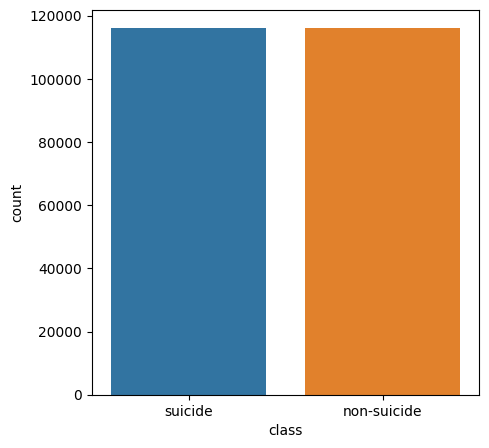

In [63]:
# Check data distribution
class_counts = df['class'].value_counts()
print(class_counts)

plt.figure(figsize=((5,5)))
sns.countplot(df, x='class')
plt.show()

Data is balanced, so no need to balance it.

### Text Preprocessing

In [64]:
df.head()

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


### Lowercasing

Lowercasing is done to reduce the vocabulary size.

In [65]:
df['text'] = df['text'].str.lower()

In [66]:
df.head()

,text,class
0,ex wife threatening suiciderecently i left my ...,suicide
1,am i weird i don't get affected by compliments...,non-suicide
2,finally 2020 is almost over... so i can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"i’m so losthello, my name is adam (16) and i’v...",suicide


### Removing Punctuations

Removing symbols and punctuations, since they don't add any value to the text. Such as: `!@#$%^&*()_+{}|:"<>?[]\;',./`

In [67]:
df['text'] = df['text'].str.replace(r'[^\w\s]+', '',regex = True)

In [68]:
df.head()

,text,class
0,ex wife threatening suiciderecently i left my ...,suicide
1,am i weird i dont get affected by compliments ...,non-suicide
2,finally 2020 is almost over so i can never hea...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,im so losthello my name is adam 16 and ive bee...,suicide


### Removing Stopwords

Stopwords are the most common words in a language. They don't add any value to the text. Such as: `the, a, an, in, on, at, for, this, that, is, are, was, were, to, from, of, etc.`

In [69]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [70]:
# nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [71]:
df.head()

,text,class
0,ex wife threatening suiciderecently left wife ...,suicide
1,weird dont get affected compliments coming som...,non-suicide
2,finally 2020 almost never hear 2020 bad year e...,non-suicide
3,need helpjust help im crying hard,suicide
4,im losthello name adam 16 ive struggling years...,suicide


### Tokenization

Tokenization is the process of splitting the text into smaller chunks called tokens. Tokens can be words, characters, or subwords. In this case, we'll be using words as tokens.

In [72]:
df['text'] = df['text'].apply(lambda x:nltk.tokenize.word_tokenize(x))

In [73]:
df.head()

,text,class
0,"[ex, wife, threatening, suiciderecently, left,...",suicide
1,"[weird, dont, get, affected, compliments, comi...",non-suicide
2,"[finally, 2020, almost, never, hear, 2020, bad...",non-suicide
3,"[need, helpjust, help, im, crying, hard]",suicide
4,"[im, losthello, name, adam, 16, ive, strugglin...",suicide


### Lemmatization

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word. 

In [74]:
lemmatizer = nltk.stem.WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x : [lemmatizer.lemmatize(i) for i in x])

In [75]:
df['text']=df['text'].apply(lambda x : ' '.join(x))

In [76]:
df.head()

,text,class
0,ex wife threatening suiciderecently left wife ...,suicide
1,weird dont get affected compliment coming some...,non-suicide
2,finally 2020 almost never hear 2020 bad year e...,non-suicide
3,need helpjust help im cry hard,suicide
4,im losthello name adam 16 ive struggling year ...,suicide


## Saving the Data

In [77]:
df.to_csv("./dataset/processed.csv", index=False)